<a href="https://colab.research.google.com/github/ferrefab/pythonProject/blob/main/ferrefab_galejua_pythonProject_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Einleitung**

Nachdem wir im vorherigen Notebook eine erste Datenanalyse durchgeführt haben, konzentrieren wir uns nun darauf, die beiden Datensätze (Arabica und Cotter) sinnvoll zu kombinieren. Dieser Schritt ist entscheidend, um die Grundlage für ein Machine-Learning-Modell zu schaffen, das Empfehlungen zur Geschmacksoptimierung von Kaffee gibt.

### Ziele dieses Notebooks

1.   Datenbereinigung und Vorbereitung

  *   Sicherstellen das beide Datensätze konsistente Formate und Wertebereiche haben.
  *   Umgang mit fehlenden Daten und eventuell redundanten Daten.


2.   Zusammenführung der Datensätze

  *   Identifikation gemeinsamer Informationen zwischen den beiden Datensätzen
  *   Entwicklung eines einheitlichen Datensatzes, welches alle relevanten Merkmale beider Datensätze enthält.


3.   Feature Engineering und Transformation

  *   Transformation der Daten, sodass sie für das Training eines ML-Modells genutzt werden können


4.   Zielsetzung für das Modell

  *  Definition der Zielvariable und Auswahl der relevanten Features



Am Ende dieses Abschnitts verfügen wir über einen vereinten und transformierten Datensatz, der sich für das Training eines Machine-Learning-Modells eignet. Dieser Datensatz wird bestenfalls sowohl sensorische Merkmale als auch experimentelle Variablen kombinieren, um präzise und personalisierte Empfehlungen zur Geschmacksoptimierung zu ermöglichen.



In [ ]:
# Importieren der bereinigten Daten aus dem letzten Notebook

import requests
import pandas as pd

def download_file(url, target_path):
  try:
    response = requests.get(url)
    response.raise_for_status()
    with open(target_path, "wb")as f:
      f.write(response.content)
    print(f"Downloaded file {target_path}")
  except requests.exceptions.RequestException as e:
    print(f"Failed to Download {url}. Error: {e}")

files_to_download = [
    ('https://raw.githubusercontent.com/galeajua/coffee-brewer/master/data/arabica_clean.csv', 'arabica.csv'),
    ('https://raw.githubusercontent.com/galeajua/coffee-brewer/master/data/cotter_clean.csv', 'cotter.csv')
]

for url, path in files_to_download:
  download_file(url, path)

arabica_data = pd.read_csv('arabica.csv')
cotter_data = pd.read_csv('cotter.csv')


Downloaded file arabica.csv
Downloaded file cotter.csv


###Datenübersicht

Arabica-Datensatz: Fokus auf sensorische Bewertungen, Herkunft, Höhenlage und Verarbeitung von Kaffee

Cotter-Datensatz: Fokus auf sensorische wie auf experimentelle Variablen wie Brew, Temperature, Mahlgrösse und Konsumentenbewertungen (Liking)


####Gemeinsame Features

Sensorische Attribute:

*   Arabica: Acidity, Flavor, Body
*   Cotter: Acidity, Flavor.intensity, Mouthfeel

Qualitätsbewertung:

*   Arabica: score
*   Cotter: Liking






In [ ]:
# Importieren benötigter Bibliotheken
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Info zu null-Werten und Datentypen
pd.set_option("display.max.columns", None)
print("Arabica Dataset:")
arabica_data.info()
print("\nCotter Dataset:")
cotter_data.info()

Arabica Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   score              1312 non-null   float64
 1   Species            1312 non-null   object 
 2   Country of Origin  1311 non-null   object 
 3   altitude_meters    1312 non-null   float64
 4   Variety            1110 non-null   object 
 5   Processing Method  1159 non-null   object 
 6   Aroma              1312 non-null   float64
 7   Flavor             1312 non-null   float64
 8   Aftertaste         1312 non-null   float64
 9   Acidity            1312 non-null   float64
 10  Body               1312 non-null   float64
 11  Balance            1312 non-null   float64
 12  Uniformity         1312 non-null   float64
 13  Clean Cup          1312 non-null   float64
 14  Sweetness          1312 non-null   float64
 15  Cupper Points      1312 non-null   float64
 16  Total C

###  Weitere Datenoptimierung und -bereinigung

   Es erfolgt eine genauere Betrachtung der Werte einiger features und ob eine allfällige Optimierung der Datentypen in Frage kommt. Ausserdem werden die Daten weiter bereinigt

  



In [ ]:
# Arabica-Datensatz:
arabica_data.rename(columns={'Country of Origin': 'country',
                             'Processing Method': 'processing_method',
                             'Clean Cup': 'clean_cup',
                             'Cupper Points': 'cupper_points',
                             'Total Cup Points': 'total_cup_points'
                             }, inplace=True)

print("\nNumber of occurrences of unique values for object types in the Arabica dataset:")
object_columns = arabica_data.select_dtypes(include='object')
unique_counts_arabica = object_columns.apply(lambda col: col.nunique())
print(unique_counts_arabica)


Number of occurrences of unique values for object types in the Arabica dataset:
Species               1
country              36
Variety              29
processing_method     5
Color                 3
altitude_group        4
dtype: int64


In [ ]:
arabica_data.head()

,score,Species,country,altitude_meters,Variety,processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,clean_cup,Sweetness,cupper_points,total_cup_points,moisture_percent,Color,altitude_group
0,90.58,Arabica,Ethiopia,2075.0,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,Green,Very High
1,89.92,Arabica,Ethiopia,2075.0,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,Green,Very High
2,89.75,Arabica,Guatemala,1700.0,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,NaN,High
3,89.00,Arabica,Ethiopia,2000.0,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,Green,High
4,88.83,Arabica,Ethiopia,2075.0,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,Green,Very High


---

 Da es sich beim Arabica-Datensatz ausschliesslich um Einträge bezüglich der Arabica-Sorte handelt, ist die Spalte 'Species'
 redundant und wir können sie löschen:

---

In [ ]:
arabica_data = arabica_data.drop(columns=['Species'])

In [ ]:
# Funktion um Datentypen anzupassen
def downsize_df(df, original_dtype, target_dtype):
  float_columns = df.select_dtypes(include=original_dtype).columns
  df[float_columns] = df[float_columns].astype(target_dtype)
  return df


---

 Umwandlung der Spalten 'country', 'Variety', 'processing_method', 'Color' und 'altitude_group' von object-Datentyp in category-Datentyp:


---

In [ ]:
arabica_data = downsize_df(arabica_data, 'object', 'category')

In [ ]:
arabica_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   score              1312 non-null   float64 
 1   country            1311 non-null   category
 2   altitude_meters    1312 non-null   float64 
 3   Variety            1110 non-null   category
 4   processing_method  1159 non-null   category
 5   Aroma              1312 non-null   float64 
 6   Flavor             1312 non-null   float64 
 7   Aftertaste         1312 non-null   float64 
 8   Acidity            1312 non-null   float64 
 9   Body               1312 non-null   float64 
 10  Balance            1312 non-null   float64 
 11  Uniformity         1312 non-null   float64 
 12  clean_cup          1312 non-null   float64 
 13  Sweetness          1312 non-null   float64 
 14  cupper_points      1312 non-null   float64 
 15  total_cup_points   1312 non-null   float64 
 16  moistu

In [ ]:
# Min und max-Werte der numerischen Spalten
arabica_data.describe()

,score,altitude_meters,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,clean_cup,Sweetness,cupper_points,total_cup_points,moisture_percent
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,82.086212,1510.387860,7.562614,7.516913,7.396822,7.532614,7.516570,7.516349,9.825899,9.825625,9.895724,7.496723,82.086212,0.088796
std,3.675542,576.883792,0.380976,0.402017,0.406202,0.381879,0.361512,0.408316,0.621552,0.817449,0.596925,0.476228,3.675542,0.048001
min,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.170000,1200.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.090000
50%,82.500000,1510.387860,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000
75%,83.670000,1650.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000
max,90.580000,3000.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000


In [ ]:
# Alle Spaltennamen zu lowercase machen
arabica_data.columns = arabica_data.columns.str.lower()

# Umwandlung von float64-Spalten ind float32-Spalten, um In-Memory zu sparen
arabica_data = downsize_df(arabica_data, 'float64', 'float32')

In [ ]:
# Datentypen sind angepasst und Datengrösse wurde verringert
arabica_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   score              1312 non-null   float32 
 1   country            1311 non-null   category
 2   altitude_meters    1312 non-null   float32 
 3   variety            1110 non-null   category
 4   processing_method  1159 non-null   category
 5   aroma              1312 non-null   float32 
 6   flavor             1312 non-null   float32 
 7   aftertaste         1312 non-null   float32 
 8   acidity            1312 non-null   float32 
 9   body               1312 non-null   float32 
 10  balance            1312 non-null   float32 
 11  uniformity         1312 non-null   float32 
 12  clean_cup          1312 non-null   float32 
 13  sweetness          1312 non-null   float32 
 14  cupper_points      1312 non-null   float32 
 15  total_cup_points   1312 non-null   float32 
 16  moistu

---

 Im Arabica-Datensatz sehen wir für beinahe alle Spalten, dass der kleinste Wert 0.000000 ist. Dies könnte auf ungültige oder nicht vorhandene Werte deuten.

 Zunächst prüfen wir die Gültigkeit der Werte in den jeweiligen Spalten:

---

In [ ]:
# Methode um einige Kennzahlen zu 0- und Nan-Werte einzusehen:

def zero_value_info(df, column, isZeroCountOnly=True):
  if isZeroCountOnly:
    zero_values_count(df, column=column)
    return

  zero_values_count(df, column=column)
  # Prüfen, ob der Wert 0 tatsächlich vorkommt
  print(f"unique values for this column: {df[column].unique()}\n")

  # Rows, die für die jeweilige Spalte den Wert 0 haben
  zero_rows = df[df[column] == 0.0]
  print(f"Rows with value 0 for column {column}:\n\n{zero_rows}\n")

  print(f"number of actual NaN values: {df[column].isnull().sum()}\n")

def zero_values_count(df, column):
  # Total Anzahl Vorkommnisse des Wertes 0 im Datensatz
  zero_count = (df[column] == 0.0).sum()
  print(f"Number of zeros for {column}: {zero_count}\n")

# 'flavor' in Arabica
zero_value_info(arabica_data, 'flavor', isZeroCountOnly=False)

Number of zeros for flavor: 1

unique values for this column: [8.83 8.67 8.5  8.58 8.42 8.33 8.25 8.17 8.08 8.   7.83 7.75 7.92 7.58
 7.67 7.81 7.5  7.88 7.42 7.25 7.33 7.   7.08 7.17 6.92 6.67 6.83 6.5
 6.75 6.08 6.17 6.33 6.58 6.42 6.   0.  ]

Rows with value 0 for column flavor:

      score   country  altitude_meters  variety processing_method  aroma  \
1311    0.0  Honduras           1400.0  Caturra               NaN    0.0   

      flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
1311     0.0         0.0      0.0   0.0      0.0         0.0        0.0   

      sweetness  cupper_points  total_cup_points  moisture_percent  color  \
1311        0.0            0.0               0.0              0.12  Green   

     altitude_group  
1311         Medium  

number of actual NaN values: 0



In [ ]:
# Vergleich mit anderen Zeilen mit ähnlichen Werten für 'country' und 'altitude_group'
similar_rows = arabica_data[(arabica_data['country'] == 'Honduras') & (arabica_data['altitude_group'] == 'Medium')]
print(f"similar rows: \n\n{similar_rows.head(10)}")

similar rows: 

         score   country  altitude_meters  variety processing_method  aroma  \
28   86.669998  Honduras           1400.0  Caturra               NaN   8.17   
122  84.750000  Honduras           1450.0   Catuai      Washed / Wet   7.83   
180  84.330002  Honduras           1500.0  Caturra               NaN   7.92   
182  84.330002  Honduras           1500.0   Catuai      Washed / Wet   7.58   
242  84.000000  Honduras           1500.0  Caturra      Washed / Wet   7.42   
316  83.669998  Honduras           1400.0  Caturra      Washed / Wet   7.50   
364  83.500000  Honduras           1350.0  Caturra     Natural / Dry   7.67   
446  83.169998  Honduras           1450.0   Catuai      Washed / Wet   7.67   
458  83.169998  Honduras           1450.0   Catuai     Natural / Dry   7.50   
459  83.169998  Honduras           1350.0  Caturra     Natural / Dry   7.67   

     flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
28     8.08        8.08     8.00  8.08  

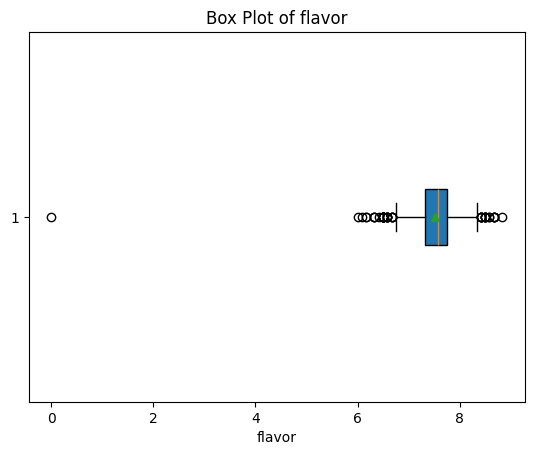

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(arabica_data['flavor'], vert=False, patch_artist=True, showmeans=True)
plt.title('Box Plot of flavor')
plt.xlabel('flavor')
plt.show()


---

Aus der Analyse für die Spalte 'flavor' geht hervor, dass es sich beim Wert 0.000000 um einen Ausreisser handelt
 und wir die Zeile 1311 aus dem Datensatz rauslöschen können, da andere Zeilen mit den gleichen Attributwerten für
 die Spalten 'country' und 'altitude_group' gültige Werte für die restlichen Spalten aufzuweisen scheinen:

---

In [ ]:
arabica_data = arabica_data[~((arabica_data['flavor'] == 0.0) & (arabica_data['country'] == 'Honduras') & (arabica_data['altitude_group'] == 'Medium'))]

In [ ]:
arabica_data.describe()


,score,altitude_meters,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture_percent
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000
mean,82.148827,1510.472046,7.568383,7.522647,7.402464,7.538360,7.522304,7.522082,9.833394,9.83312,9.903273,7.502441,82.148827,0.088772
std,2.893505,577.095154,0.318687,0.344348,0.351180,0.320307,0.296022,0.351697,0.559343,0.77135,0.530832,0.428989,2.893505,0.048012
min,43.130001,300.000000,5.080000,6.000000,6.170000,5.250000,5.250000,6.000000,0.000000,0.00000,0.000000,5.170000,43.130001,0.000000
25%,81.169998,1200.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.169998,0.090000
50%,82.500000,1510.387817,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000
75%,83.669998,1650.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.669998,0.120000
max,90.580002,3000.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580002,0.280000


In [ ]:
# Prüfung weiterer Spalten mit einem min-Wert von 0:
zero_value_info(arabica_data, 'score')
zero_value_info(arabica_data, 'acidity')
zero_value_info(arabica_data, 'body')
zero_value_info(arabica_data,'sweetness')
zero_value_info(arabica_data,'uniformity')
zero_value_info(arabica_data,'clean_cup')
zero_value_info(arabica_data,'moisture_percent')

Number of zeros for score: 0

Number of zeros for acidity: 0

Number of zeros for body: 0

Number of zeros for sweetness: 1

Number of zeros for uniformity: 1

Number of zeros for clean_cup: 2

Number of zeros for moisture_percent: 253



---

 Wie wir sehen, wurde für 'score', 'acidity' und 'body' die einzige Zeile, wo der Wert 0 vorkam, mit der letzten Bereinigung für 'flavor' ebenfalls bereinigt.
 Schauen wir uns 'sweetness' genauer an:

---

In [ ]:
zero_value_info(arabica_data, 'sweetness', isZeroCountOnly=False)

Number of zeros for sweetness: 1

unique values for this column: [10.    9.33  8.67  6.67  8.    6.    1.33  0.  ]

Rows with value 0 for column sweetness:

          score   country  altitude_meters variety processing_method  aroma  \
1310  43.130001  Ethiopia      1510.387817     NaN               NaN    6.0   

      flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
1310     6.0        6.25     6.88   6.0      6.0         0.0        0.0   

      sweetness  cupper_points  total_cup_points  moisture_percent color  \
1310        0.0            6.0         43.130001               0.0   NaN   

     altitude_group  
1310         Medium  

number of actual NaN values: 0



In [ ]:
# Nur eine Zeile beinhaltet den Wert 0.0 für 'sweetness'
print(arabica_data['sweetness'].value_counts())

sweetness
10.00    1218
9.33       61
8.67       12
8.00        8
6.67        7
6.00        3
1.33        1
0.00        1
Name: count, dtype: int64


In [ ]:
# Da 10.00 der Wert ist der am häufigsten autritt, benutzen wir diesen um den Wert anzupassen
mode_sweetness = arabica_data['sweetness'].mode()[0]
arabica_data['sweetness'] = arabica_data['sweetness'].replace(0.0, mode_sweetness)

In [ ]:
# Wie sieht es mit 'uniformity' aus?
zero_value_info(arabica_data, 'uniformity', isZeroCountOnly=False)

Number of zeros for uniformity: 1

unique values for this column: [10.    9.33  9.5   8.67  9.    6.67  8.    7.33  6.    0.  ]

Rows with value 0 for column uniformity:

          score   country  altitude_meters variety processing_method  aroma  \
1310  43.130001  Ethiopia      1510.387817     NaN               NaN    6.0   

      flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
1310     6.0        6.25     6.88   6.0      6.0         0.0        0.0   

      sweetness  cupper_points  total_cup_points  moisture_percent color  \
1310       10.0            6.0         43.130001               0.0   NaN   

     altitude_group  
1310         Medium  

number of actual NaN values: 0



In [ ]:
# Da nur eine Zeile 0 als Wert für 'uniformity' hat und der Rest der Werte für diese Zeile,
# bis auf NaN-Werte für 'variety', 'processing_method' und 'color', gültig erscheinen, ersetzen wir
# diesen 0-Wert mit dem Durchschnitt der Spalte 'uniformity':

# Methode um Zelle mit dem Durchschnitt zu ersetzen
def fill_avg(df, row_index, column):
  df.loc[row_index, column] = df.loc[df.index != row_index, column].mean()

fill_avg(arabica_data, 1310, 'uniformity')

In [ ]:
# Wie sieht es mit 'clean_cup' aus?
zero_value_info(arabica_data, 'clean_cup', isZeroCountOnly=False)

Number of zeros for clean_cup: 2

unique values for this column: [10.    9.33  8.67  6.67  8.    5.33  7.33  6.    2.67  0.    1.33]

Rows with value 0 for column clean_cup:

          score   country  altitude_meters  variety processing_method  aroma  \
1306  68.330002    Mexico       900.000000  Bourbon      Washed / Wet   7.08   
1310  43.130001  Ethiopia      1510.387817      NaN               NaN   6.00   

      flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
1306    6.83        6.25     7.42  7.25     6.75     10.0000        0.0   
1310    6.00        6.25     6.88  6.00     6.00      9.8409        0.0   

      sweetness  cupper_points  total_cup_points  moisture_percent color  \
1306       10.0           6.75         68.330002              0.11   NaN   
1310       10.0           6.00         43.130001              0.00   NaN   

     altitude_group  
1306            Low  
1310         Medium  

number of actual NaN values: 0



In [ ]:
# Da auch hier lediglich zwei Zeilen 0 als Wert aufzeigen und der Rest der Werte für diese Zeile bis
# auf ein paar NaN-Werte gültig erscheinen, ersetzen wir diese beiden 0-Werte mit dem Durchschnitt der Spalte 'clean_cup':
fill_avg(arabica_data, 1306, 'clean_cup')
fill_avg(arabica_data, 1310, 'clean_cup')

In [ ]:
arabica_data.describe()

,score,altitude_meters,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture_percent
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,82.148827,1510.472046,7.568383,7.522647,7.402464,7.538360,7.522304,7.522082,9.840901,9.848138,9.910900,7.502441,82.148827,0.088772
std,2.893505,577.095154,0.318687,0.344348,0.351180,0.320307,0.296022,0.351697,0.488871,0.668682,0.454824,0.428989,2.893505,0.048012
min,43.130001,300.000000,5.080000,6.000000,6.170000,5.250000,5.250000,6.000000,6.000000,1.330000,1.330000,5.170000,43.130001,0.000000
25%,81.169998,1200.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.169998,0.090000
50%,82.500000,1510.387817,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000
75%,83.669998,1650.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.669998,0.120000
max,90.580002,3000.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580002,0.280000


In [ ]:
# Fehlende Werte pro Spalte:
missing_summary = arabica_data.isnull().sum()
print(f"missing_summary: {missing_summary}")

missing_summary: score                  0
country                1
altitude_meters        0
variety              202
processing_method    152
aroma                  0
flavor                 0
aftertaste             0
acidity                0
body                   0
balance                0
uniformity             0
clean_cup              0
sweetness              0
cupper_points          0
total_cup_points       0
moisture_percent       0
color                268
altitude_group         0
dtype: int64


---

 Unter Berücksichtigung der Relevanz der einzelnen Spalten für die Erreichung unseres Vorhabens und der Anzahl null-Werte, entscheiden wir uns die Spalten 'variety', 'processing_method' und 'color'
 aus dem Datensatz zu entfernen. Ebenso entfernen wir die Spalte 'moisture_percent', da sie mit 253 0-Werten wenig Mehrwert bietet, da 0%-Werte bei der Feuchtigkeit
 von Kaffeebohnen unrealistisch sind:

---

In [ ]:
arabica_data = arabica_data.drop(columns=['variety', 'processing_method', 'color', 'moisture_percent'])

In [ ]:
arabica_data.head()

,score,country,altitude_meters,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_group
0,90.580002,Ethiopia,2075.0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.580002,Very High
1,89.919998,Ethiopia,2075.0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.919998,Very High
2,89.750000,Guatemala,1700.0,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.750000,High
3,89.000000,Ethiopia,2000.0,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.000000,High
4,88.830002,Ethiopia,2075.0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.830002,Very High


---

Es erfolgt eine weitere Bereinigung des Cotter-Datensatzes

---

In [ ]:
# Bereinigen des Cotter-Datensatzes
cotter_data.rename(columns={'Dose': 'dose_grams',
                                          'Brew_Mass (g)': 'brew_mass_grams',
                                          'extraction (%)': 'extraction_percent',
                                          'Flavor.intensity': 'flavor_intensity',
                                          'Tea.floral': 'tea_floral',
                                          'Green.veg': 'green_veg',
                                          'Paper.wood': 'paper_wood',
                                          'Dark.chocolate': 'dark_chocolate',
                                          'Thick.viscous': 'thick_viscous',
                                          'target_extraction (%)': 'target_extraction_percent'},
                                          inplace=True)

print("\nNumber of occurrences of unique values for each variable in the Cotter dataset:")
unique_counts_cotter = cotter_data.nunique()
print(unique_counts_cotter)


Number of occurrences of unique values for each variable in the Cotter dataset:
dose_grams                                12
Setting                                   11
Grind                                      3
brew_mass_grams                          157
total_dissolved_solids_percent            63
extraction_percent                       162
pH                                        21
Brew Temperature                          72
Liking                                     9
Temp                                       5
flavor_intensity                           5
Acidity                                    5
Mouthfeel                                  5
tea_floral                                 2
Fruit                                      2
Citrus                                     2
green_veg                                  2
paper_wood                                 2
Burnt                                      2
Cereal                                     2
Nutty              

In [ ]:
cotter_data.describe()

,dose_grams,Grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,pH,Brew Temperature,Liking,Temp,flavor_intensity,Acidity,Mouthfeel,tea_floral,Fruit,Citrus,green_veg,paper_wood,Burnt,Cereal,Nutty,dark_chocolate,Caramel,Bitter,Astringent,Roasted,Sour,thick_viscous,Sweet,Rubber,target_brew_temperature,target_total_dissolved_solids_percent,target_extraction_percent
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,180.125926,3.740741,2826.474231,1.271777,20.363055,5.043807,81.924608,5.851538,3.327370,2.800691,3.141871,2.806654,0.196171,0.157564,0.181105,0.130571,0.231952,0.180163,0.109542,0.293158,0.213120,0.129630,0.314815,0.113308,0.450094,0.338983,0.076585,0.191149,0.070308,90.000000,1.250000,20.000000
std,39.226754,0.926812,50.690767,0.225153,3.242459,0.044921,2.306856,1.739266,0.669017,0.836085,0.829192,0.687383,0.397162,0.364389,0.385165,0.336984,0.422145,0.384384,0.312367,0.455282,0.409576,0.335948,0.464515,0.317019,0.497581,0.473438,0.265974,0.393268,0.255705,2.449874,0.204156,3.266499
min,119.000000,3.000000,2697.000000,0.930000,13.970632,4.940000,77.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.000000,1.000000,16.000000
25%,149.000000,3.000000,2790.800000,1.030000,17.034649,5.010000,80.200000,5.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.000000,1.000000,16.000000
50%,176.100000,3.000000,2821.200000,1.295000,20.604910,5.040000,81.900000,6.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,1.250000,20.000000
75%,207.600000,5.000000,2862.800000,1.470000,23.090318,5.080000,83.800000,7.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,93.000000,1.500000,24.000000
max,265.000000,5.000000,2958.200000,2.290000,36.642601,5.150000,86.700000,9.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.500000,24.000000


---

 Gemäss Datensatzbeschreibung sind die Spalten tea_floral, Fruit, Citrus, green_veg, paper_wood, Burnt, Cereal, Nutty, dark_chocolate, Caramel, Bitter,
 Astringent, Roasted, Sour, thick_viscous, Rubber und Sweet binäre Werte. Deshalb wandeln wir sie jeweils in den 'bool'-Datentyp um:

---

In [ ]:
columns_to_convert = [
    'tea_floral', 'Fruit', 'Citrus', 'green_veg', 'paper_wood', 'Burnt', 'Cereal',
    'Nutty', 'dark_chocolate', 'Caramel', 'Bitter', 'Astringent', 'Roasted',
    'Sour', 'thick_viscous', 'Rubber', 'Sweet'
]

cotter_data[columns_to_convert] = cotter_data[columns_to_convert].astype(bool)

# Alle Spaltennamen zu lowercase machen
cotter_data.columns = cotter_data.columns.str.lower()

# Verringern der Datensatzgrösse indem wir die 'float64'-Spalten in 'float32'-Spalten umwandeln sowie 'int64' in 'int16'
cotter_data = downsize_df(cotter_data, 'float64', 'float32')
cotter_data = downsize_df(cotter_data, 'int64', 'int16')
cotter_data = downsize_df(cotter_data, 'object', 'category')

In [ ]:
# Datentypen sind angepasst und Datengrösse wurde verringert
cotter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   dose_grams                             3186 non-null   float32 
 1   setting                                3186 non-null   category
 2   grind                                  3186 non-null   int16   
 3   brew_mass_grams                        3186 non-null   float32 
 4   total_dissolved_solids_percent         3186 non-null   float32 
 5   extraction_percent                     3186 non-null   float32 
 6   ph                                     3186 non-null   float32 
 7   brew temperature                       3186 non-null   float32 
 8   liking                                 3186 non-null   int16   
 9   temp                                   3186 non-null   int16   
 10  flavor_intensity                       3186 non-null   int16

In [ ]:
# Prüfung Gültigkeit der min-Werte für Cotter-Spalten um zu schauen, ob unrealistische 0-Werte existieren:
cotter_data.describe()

,dose_grams,grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,liking,temp,flavor_intensity,acidity,mouthfeel,target_brew_temperature,target_total_dissolved_solids_percent,target_extraction_percent
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,180.125916,3.740741,2826.474365,1.271776,20.363056,5.043808,81.924599,5.851538,3.327370,2.800691,3.141871,2.806654,90.000000,1.250000,20.000000
std,39.226608,0.926812,50.690849,0.225153,3.242462,0.044921,2.306854,1.739266,0.669017,0.836085,0.829192,0.687383,2.449874,0.204156,3.266499
min,119.000000,3.000000,2697.000000,0.930000,13.970632,4.940000,77.599998,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000,16.000000
25%,149.000000,3.000000,2790.800049,1.030000,17.034649,5.010000,80.199997,5.000000,3.000000,2.000000,3.000000,2.000000,87.000000,1.000000,16.000000
50%,176.100006,3.000000,2821.199951,1.295000,20.604910,5.040000,81.900002,6.000000,3.000000,3.000000,3.000000,3.000000,90.000000,1.250000,20.000000
75%,207.600006,5.000000,2862.800049,1.470000,23.090319,5.080000,83.800003,7.000000,4.000000,3.000000,4.000000,3.000000,93.000000,1.500000,24.000000
max,265.000000,5.000000,2958.199951,2.290000,36.642601,5.150000,86.699997,9.000000,5.000000,5.000000,5.000000,5.000000,93.000000,1.500000,24.000000


## Normalisierung und Vereinigung der Datensätze

---

Es folgt eine konsistente Skalierung der Spalten, die wir ausgewählt haben, um auf deren Basis beide Datensätze zu vereinen.

---

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Jeweilige ausgewählte Spalten in beiden Datensätzen:
# 'flavor' und 'flavor_intensity', 'acidity' und 'acidity', 'body' und 'mouthfeel'.
columns_to_normalize = ['flavor', 'acidity', 'body']

# Umbenennung der Spalten-Namen im Cotter-Datensatz, um sie denen im Arabica-Datensatz anzupassen:
cotter_data.rename(columns={
    'flavor_intensity': 'flavor',
    'liking': 'score',
    'mouthfeel': 'body'
}, inplace=True)

# Kombinierung für konsistente Skalierung
combined = pd.concat([arabica_data[columns_to_normalize], cotter_data[columns_to_normalize]], axis=0)

# scaler-fit auf die kombinierten Daten und Sicherstellung, dass alle Werte im Wertebereich [0, 1] liegen:
scaler = MinMaxScaler()
combined_normalized = scaler.fit_transform(combined)

# Da combined_normalized ein 2D-Array ist, nutzen wir die slicing-Operation um den ersten Batch, welcher die Daten
# zum Arabica-Datensatz hält, zu extrahieren. Die restlichen Zeilen gehören zum Cotter-Datensatz:
first_dataset_normalized = combined_normalized[:len(arabica_data)]
second_dataset_normalized = combined_normalized[len(arabica_data):]

In [ ]:
# Wir weisen die normalisierten Spalten den jeweiligen ursprünglichen Datensätzen wieder zu.

# Erstellung Kopie des ursprünglichen Datensatzes, falls wir darauf zurückgreifen müssten:
arabica_data_normalized = arabica_data.copy()
arabica_data_normalized[columns_to_normalize] = first_dataset_normalized

cotter_data_normalized = cotter_data.copy()
cotter_data_normalized[columns_to_normalize] = second_dataset_normalized

# Aufrunden der normalisierten Werte, um eine bessere Grundlage für einen Merge zu bilden:
arabica_data_normalized[columns_to_normalize] = arabica_data_normalized[columns_to_normalize].round(1)
cotter_data_normalized[columns_to_normalize] = cotter_data_normalized[columns_to_normalize].round(1)

In [ ]:
# Methode um die einzelnen, normalisierten Werte einzusehen:
def print_unique_normalized_values(columns):
  for col in columns:
    print(f"Unique {col} values in arabica_data:")
    print(arabica_data_normalized[col].unique())
    print(f"Unique {col} values in cotter_data:")
    print(cotter_data_normalized[col].unique())
    print("\n")

print_unique_normalized_values(columns_to_normalize)

Unique flavor values in arabica_data:
[1.  0.9 0.8 0.7 0.6]
Unique flavor values in cotter_data:
[0.1 0.  0.3 0.4 0.5]


Unique acidity values in arabica_data:
[1.  0.9 0.8 0.7 0.5]
Unique acidity values in cotter_data:
[0.1 0.  0.4 0.3 0.5]


Unique body values in arabica_data:
[1.  0.9 0.8 0.6 0.7]
Unique body values in cotter_data:
[0.1 0.  0.4 0.3 0.5]




---

Aufgrund der fehlenden Wert-Überschneidungen in den Spalten 'flavor', 'acidity' und 'body' macht ein Merge beider Daten leider wenig Sinn, so wie ursprünglich gedacht. Ausserdem beinhaltet der Arabica-Datensatz alleine zu wenige Datenpunkte (Shape: 1311, 13) um aussagekräftige Modelle zu erstellen. Deswegen werden wir fortan den Cotter-Datensatz verwenden und verzichten auf den Arabica-Datensatz.

---

In [ ]:
# Speichern des Cotter-Datensatzes
try:
  cotter_data_normalized.to_csv("cotter_data_normalized.csv", index=False)
except Exception as e:
    print(f"Failed to save the normalized DataFrame. Error: {e}")

## Datenqualitätsbeurteilung und Analyse des Cotter-Datensatzes
Nach dem Entschluss, dass es nicht sinnvoll ist den Arabica- und den Cotter-Datensatz zu vereinen, um unsere Datengrundlage anzureichern, fahren wir nun wie vorhin erwähnt, lediglich mit dem Cotter-Datensatz fort, Da dieser effektive Verkostungsdaten hält. Um weiterhin uns auf das Machine Learning vorzubereiten, beurteilen wir den Datensatz nun auf seine Qualität, um potenzielle Probleme zu identifizieren, die die Modellleistung beeinträchtigen könnten:

In [ ]:
# Prüfung auf fehlende Werte
missing_values = cotter_data_normalized.isnull().sum()

# Umwandlung des Series-Objektes in ein Dataframe mit zutreffenden Spalten
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['feature', 'missing values']

missing_values_df


,feature,missing values
0,dose_grams,0
1,setting,0
2,grind,0
3,brew_mass_grams,0
4,total_dissolved_solids_percent,0
5,extraction_percent,0
6,ph,0
7,brew temperature,0
8,score,0
9,temp,0


In [ ]:
# Prüfung auf duplizierte Zeilen
cotter_data_normalized.duplicated().sum()

1

In [ ]:
# Wir haben eine duplizierte Zeile, welche wir löschen können:
cotter_data_normalized = cotter_data_normalized.drop_duplicates()

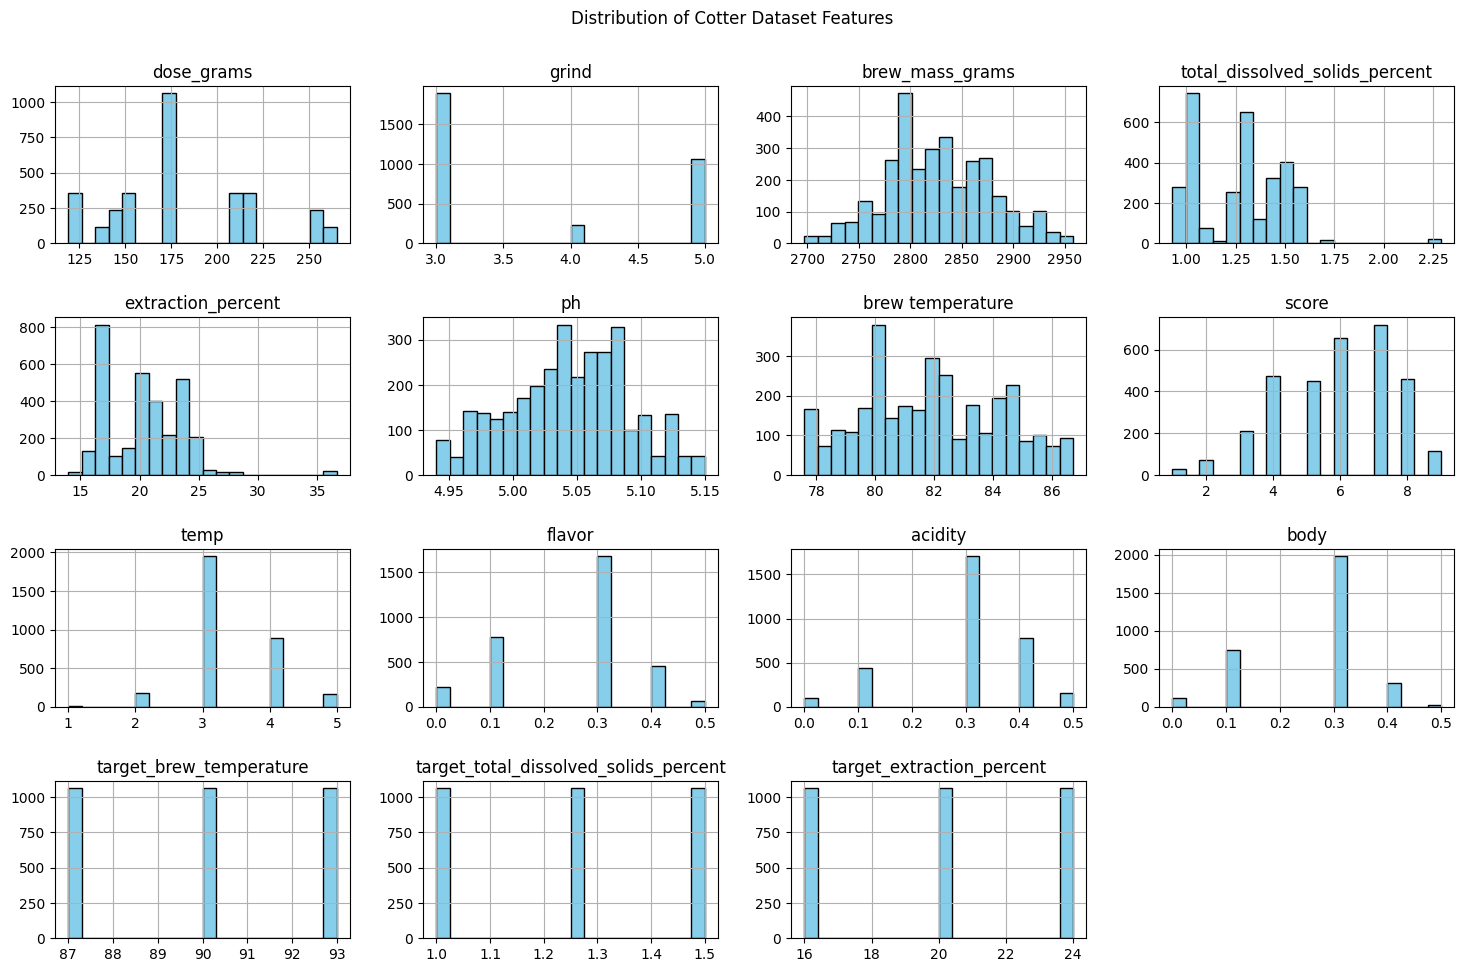

In [ ]:
# Visualisierung der Verteilungen der Cotter-Features:
cotter_data_normalized.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Cotter Dataset Features")
plt.tight_layout(pad=2.0)
plt.show()

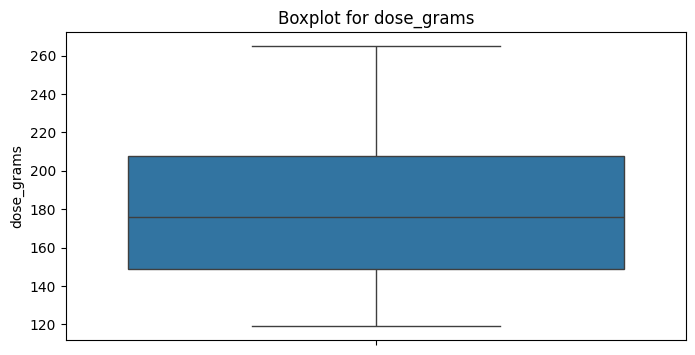

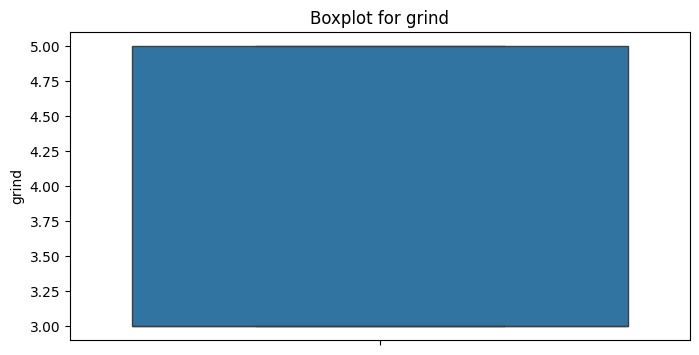

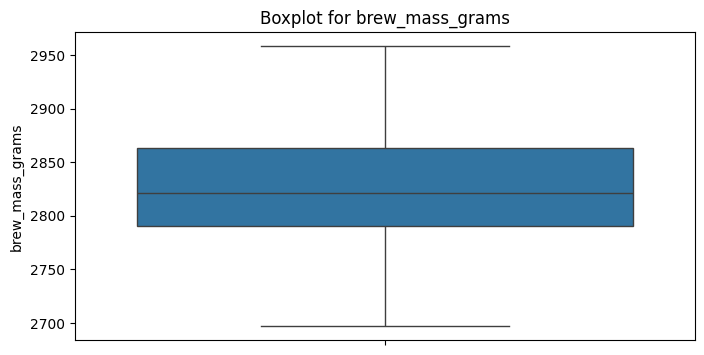

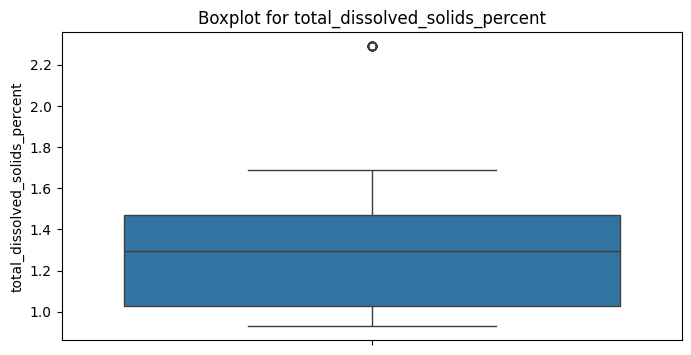

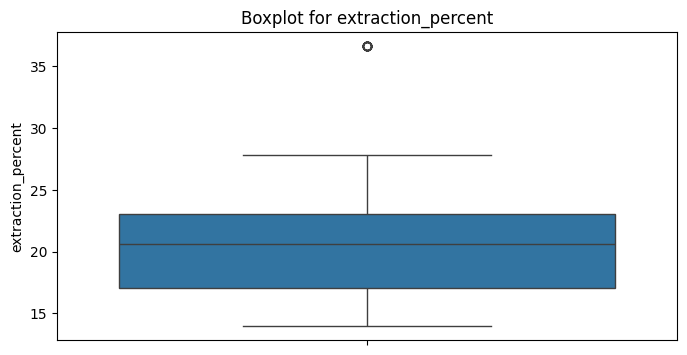

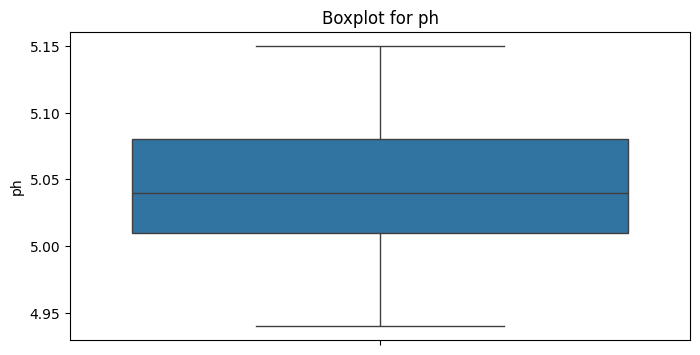

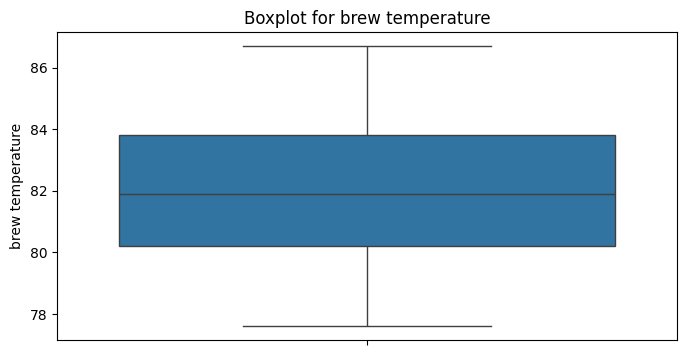

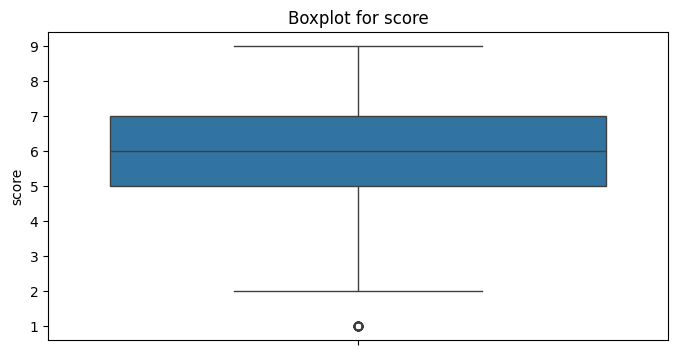

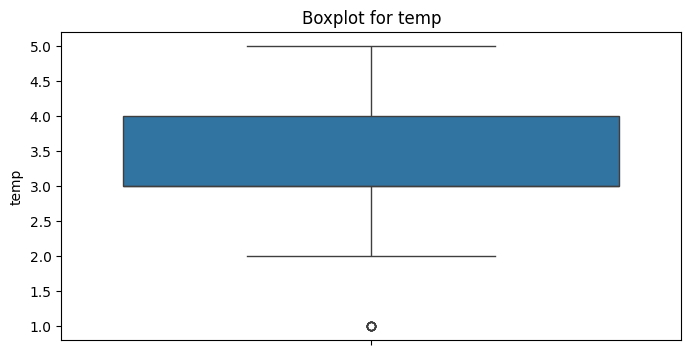

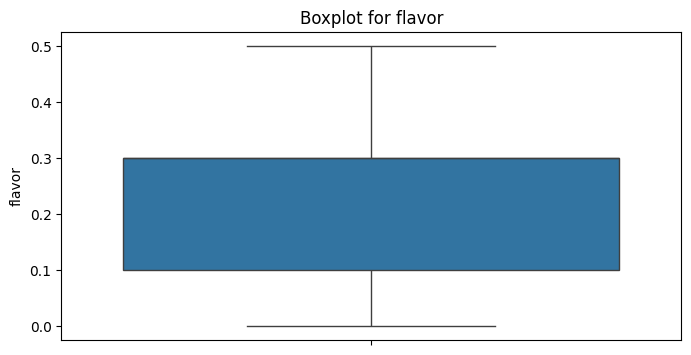

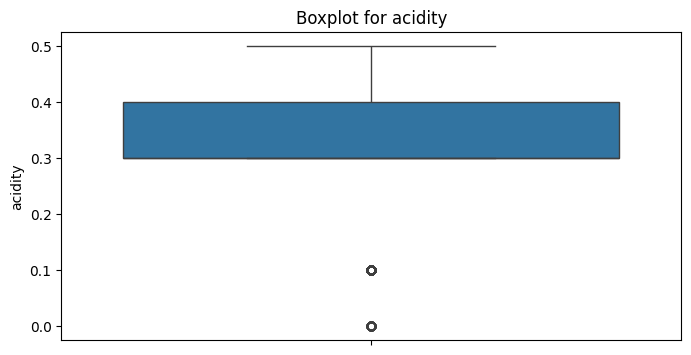

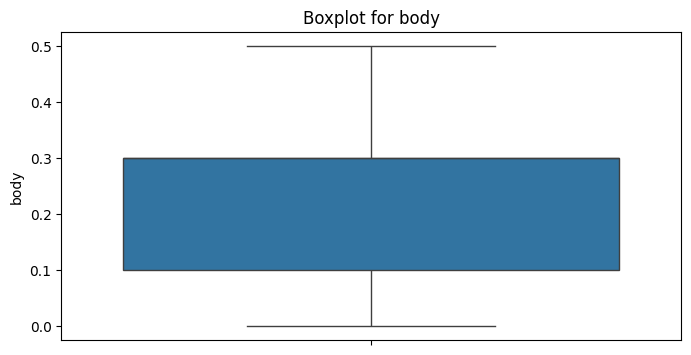

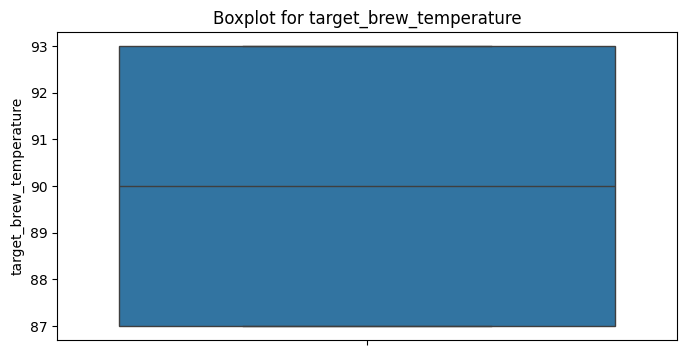

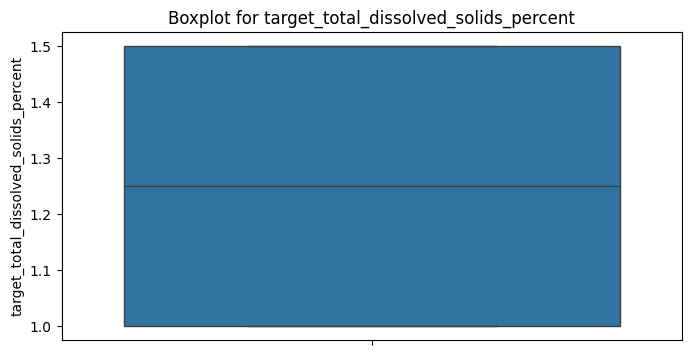

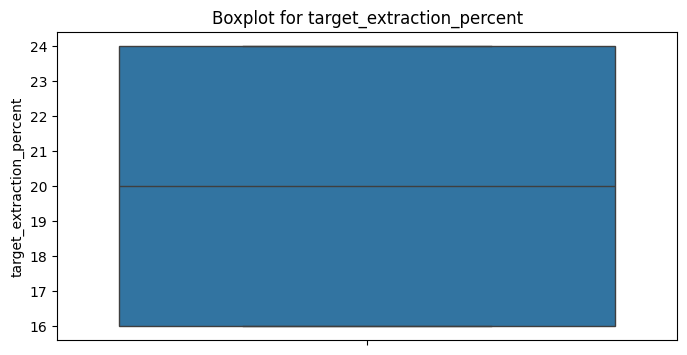

In [ ]:
# Untersuchung von möglichen Ausreissern
# Selektieren der numerischen Feature-Spalten:
numeric_columns = cotter_data_normalized.select_dtypes(include=['number']).columns

# Erstellen eines Boxplot pro Spalte:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=cotter_data_normalized[col])
    plt.title(f"Boxplot for {col}")
    plt.show()



**total_dissolved_solids_percent**

In [ ]:
# Da der Boxplot potenzielle Ausreisser aufweist, filtern wir nach Zeilen mit Werten für 'total_dissolved_solids_percent' > 2:
cotter_data_normalized[cotter_data_normalized['total_dissolved_solids_percent'] > 2.2]

,dose_grams,setting,grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,score,temp,flavor,acidity,body,tea_floral,fruit,citrus,green_veg,paper_wood,burnt,cereal,nutty,dark_chocolate,caramel,bitter,astringent,roasted,sour,thick_viscous,sweet,rubber,target_brew_temperature,target_total_dissolved_solids_percent,target_extraction_percent
485,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,5,3,0.3,0.1,0.1,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,93,1.5,24
566,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,4,0.3,0.1,0.3,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,93,1.5,24
593,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,3,0.3,0.3,0.1,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,93,1.5,24
620,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,4,3,0.1,0.3,0.1,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,93,1.5,24
647,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,4,3,0.4,0.3,0.1,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,93,1.5,24
674,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,6,3,0.4,0.4,0.4,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,93,1.5,24
701,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,4,4,0.5,0.1,0.4,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,93,1.5,24
728,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,4,0.3,0.4,0.4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,93,1.5,24
782,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,4,0.3,0.3,0.3,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,93,1.5,24
809,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,3,4,0.0,0.0,0.0,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,93,1.5,24


Da nur wenige Zeilen vom hohen Wert für 'total_dissolved_solids_percent' betroffen sind und der Wert 2.29% für einen normalen Kaffee (gewöhnliche Werte liegen zwischen 1 - 1.5%) zwar hoch, aber nicht unrealistisch ist, behalten wir diese Zeilen.

**extraction_percent**

In [ ]:
# Da der Boxplot potenzielle Ausreisser aufweist, filtern wir nach Zeilen mit Werten für 'extraction_percent' > 36:
cotter_data_normalized[cotter_data_normalized['extraction_percent'] > 36]

,dose_grams,setting,grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,score,temp,flavor,acidity,body,tea_floral,fruit,citrus,green_veg,paper_wood,burnt,cereal,nutty,dark_chocolate,caramel,bitter,astringent,roasted,sour,thick_viscous,sweet,rubber,target_brew_temperature,target_total_dissolved_solids_percent,target_extraction_percent
485,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,5,3,0.3,0.1,0.1,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,93,1.5,24
566,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,4,0.3,0.1,0.3,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,93,1.5,24
593,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,3,0.3,0.3,0.1,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,93,1.5,24
620,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,4,3,0.1,0.3,0.1,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,93,1.5,24
647,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,4,3,0.4,0.3,0.1,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,93,1.5,24
674,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,6,3,0.4,0.4,0.4,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,93,1.5,24
701,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,4,4,0.5,0.1,0.4,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,93,1.5,24
728,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,4,0.3,0.4,0.4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,93,1.5,24
782,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,7,4,0.3,0.3,0.3,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,93,1.5,24
809,176.100006,4LG,3,2817.800049,2.29,36.642601,5.05,84.0,3,4,0.0,0.0,0.0,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,93,1.5,24


Tatsächlich decken sich diese Zeilen mit den gefilterten für 'total_dissolved_solids_percent' von vorhin, was Sinn macht,
 da eine erhöhte Menge an gelösten Partikeln im gebrauten Kaffee (im Wesentlichen die Stärke des Kaffees) auch eine erhöhte
 Menge an löslichen Substanzen, die wir effektiv von den Kaffeebohnen durch den Brühprozess gelöst haben, bedeutet.

**score**

In [ ]:
# Wir schauen uns die Anzahl Vorkommnisse der einzelnen Werte an:
cotter_data_normalized['score'].value_counts()

,count
score,
7,719
6,656
4,474
8,459
5,451
3,209
9,116
2,72
1,29


 Aufgrund von vorhandenen Informationen zu unserer möglichen Zielvariable 'score' (ehemals 'Liking') wissen wir, dass sich die Variable mehr wie eine ordinale Variable verhält aufgrund der
 geringen Anzahl an einzigartigen Werten (1-9).
Der Wert 1 ein gültiger Wert für eine User-Bewertung und kommt lediglich selten vor im Vergleich zu anderen scores, deswegen
 behalten wir die entsprechenden Datenpunkte.
 Für Regressions-Modelle können wir die Werte so belassen, da der Gesamtfehler über alle Werte hinweg minimiert wird.
 Für Klassifikations-Modelle können wir die Werte anhand von Gewichten etwas ausbalancieren, da sie Klassen, die häufig auftreten, Klassen, welche
 weniger oft auftreten, vorziehen.

**temp**

In [ ]:
# Auch hier wissen wir aufgrund vorhandenen Informationen zu 'temp', dass sich die Variable mehr wie eine
# ordinale Variable verhält aufgrund der geringen Anzahl an einzigartigen Werten (1-5)
cotter_data_normalized['temp'].value_counts()

,count
temp,
3,1949
4,888
2,171
5,170
1,7


 Auch hier sehen wir eine tiefe Anzahl an Bewertungen mit 1 für 'temp', welche ebenfalls gültige Werte sind

**acidity**

In [ ]:
cotter_data_normalized['acidity'].value_counts()

,count
acidity,
0.3,1705
0.4,781
0.1,441
0.5,157
0.0,101


 Und auch hier sehen wir erneut eine relativ tiefe Anzahl an Bewertungen mit 0.0, 0.5 und 0.1  für 'acidity', welche ebenfalls gültige Werte sind.
 (Diese Spalte wurde zusammen mit anderen in einem früheren Schritt normalisiert, ehemaliger Wertebereich war 1-5)


---

 Für die Correlation Matrix und den Heatmap benötigen wir die etwas passendere Spearman-Methode, im Vergleich zur Pearson-Methode, da wir sowohl ordinale als auch kontinuierliche Datentypen haben:


---

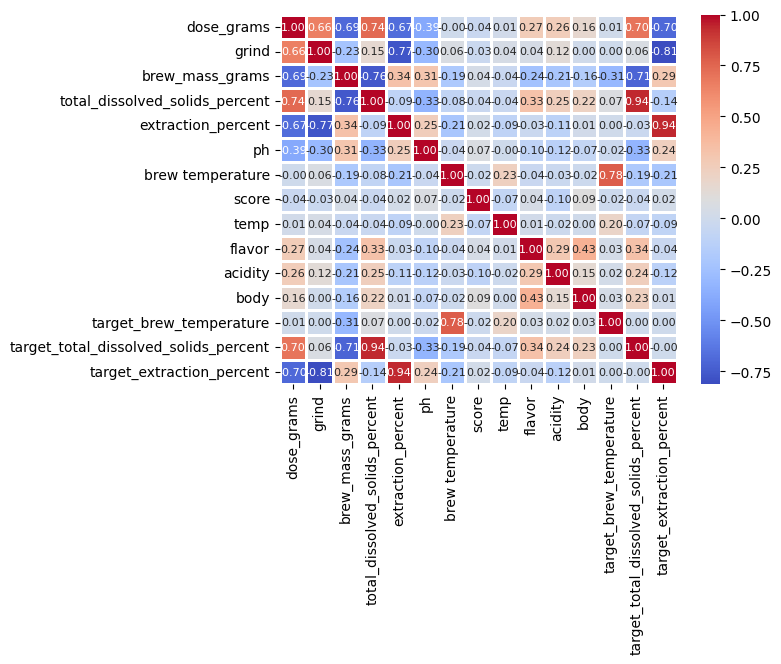

In [ ]:
numerical_df = cotter_data_normalized.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr(method='spearman')
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=1,
            linecolor='white',
            annot_kws={"size": 8})
plt.show()


 Features wie 'target_extraction_percent' und 'extraction_percent', 'target_total_dissolved_solids_percent' und 'total_dissolved_solids_percent', 'target_brew_temperature' und 'brew_temperature'
 weisen eine jeweils hohe Abhängigkeit voneinander auf (0.94 respektive 0.78), da bspw. ein Anstieg im Ziel-Prozentsatz der Gesamtextraktion
 auch ein Anstieg im Prozentsatz der effektiven Gesamtextraktion bedeutet.
 Deswegen entscheiden wir uns, um die Aussagekraft unserer Modelle später nicht zu verfälschen, die Spalten 'target_extraction_percent',
 'target_total_dissolved_solids_percent' sowie 'target_brew_temperature' zu entfernen:

In [ ]:

cotter_data_normalized.drop(columns=['target_extraction_percent', 'target_total_dissolved_solids_percent', 'target_brew_temperature'], inplace=True)

In [ ]:
# Variablen, die möglicherweise 'score' beeinflussen:
corr_matrix = cotter_data_normalized.select_dtypes(include=['number']).corr(method='spearman')
score_corr = corr_matrix['score'].sort_values(ascending=False)
for var, corr in score_corr.items():
    if var != 'score':
        print(f"{var:15} : {corr:6.3f}")

body            :  0.093
ph              :  0.066
flavor          :  0.043
brew_mass_grams :  0.035
extraction_percent :  0.015
brew temperature : -0.019
grind           : -0.029
total_dissolved_solids_percent : -0.037
dose_grams      : -0.039
temp            : -0.070
acidity         : -0.103


 Wir wollen die signifikanteren Beziehungen anhand von Pandas pivot_table veranschaulichen, da die
 betroffenen Variablen ordinaler Natur sind und bspw. Scatter-Plots wenig Sinn machen würden aufgrund
 der begrenzten Anzahl an einzigartigen Werten pro Feature. Ein pivot_table ermöglicht es uns zu zeigen, in welchem
 'score'-Bereich sich wieviele Werte, für jeden möglichen Wert, des jeweiligen Features befinden.

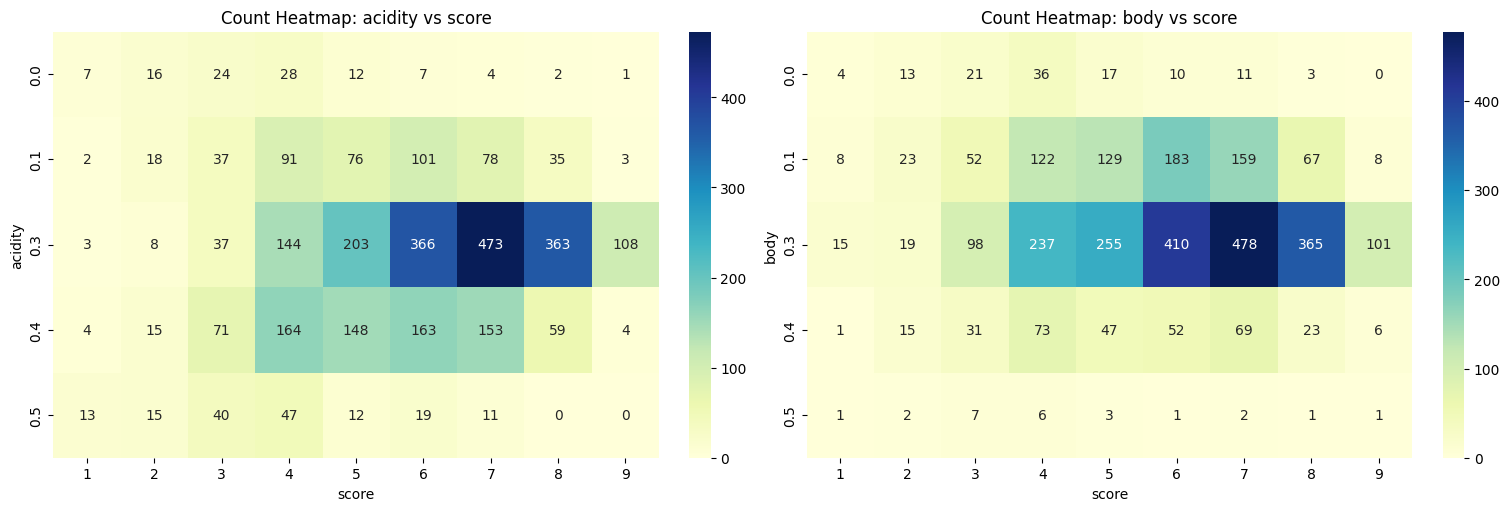

acidity         :  0.103
body            :  0.093
temp            :  0.070
ph              :  0.066
flavor          :  0.043
dose_grams      :  0.039
total_dissolved_solids_percent :  0.037
brew_mass_grams :  0.035
grind           :  0.029
brew temperature :  0.019
extraction_percent :  0.015


In [ ]:
def plot_significant_correlations(df, target='score', threshold=0.1):
    correlations = df.corr(method='spearman')[target].abs()

    # Features mit Korrelationen über dem Threshold
    significant_vars = [var for var in correlations.index
                       if var != target and correlations[var] > threshold]

    n_vars = len(significant_vars)

    if n_vars == 0:
        print(f"No variables found with correlation > {threshold}")
        return

    # Anzahl gewünschter Spalten
    n_cols = 2
    # Berechnen der benötigten Zeilen
    n_rows = (n_vars + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

    # Abflachen der Achsen für einfache Indexierung
    axes = axes.flatten()

    # Erstellung Heatmaps
    for idx, var in enumerate(significant_vars):
      # Erstellen einer pivot table für Aufzählungen
      heatmap_data = cotter_data_normalized.pivot_table(index=var, columns=target, aggfunc='size', fill_value=0)

      # Plotten der Heatmap
      sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", ax=axes[idx])
      axes[idx].set_title(f"Count Heatmap: {var} vs {target}")
      axes[idx].set_xlabel(f"{target}")
      axes[idx].set_ylabel(f"{var}")

    for ax in axes[len(significant_vars):]:
        ax.axis('off')

    plt.show()

# Plotten der signifikanten Korrelationen
plot_significant_correlations(cotter_data_normalized.select_dtypes(include=['number']), 'score', 0.09)

# Aufzeigen der Korrelationen mit 'score' zur Verifizierung
correlations = cotter_data_normalized.select_dtypes(include=['number']).corr(method='spearman')['score'].abs().sort_values(ascending=False)
for var, corr in correlations.items():
    if var != 'score':
        print(f"{var:15} : {corr:6.3f}")

Aus den obigen heatmaps ist offensichtlich, dass weder ein höherer Wert von 'acidity' ein höherer Wert für 'score' bedeutet. Gleiches gilt für 'body'. Tatsächlich liegen die meisten Werte für 'acidity' bei einem score zwischen 6 und 8 und zwar bei einem acidity-Level von 0.3, was einem moderaten Säureempfinden entspricht. Dies macht durchaus Sinn, da eine ausbalancierte Säure im Kaffee normalerweise am angenehmsten ist. Demnach liegt allem Anschein nach weder eine lineare noch eine monotone Beziehung zwischen 'acidity' und 'score' vor. Dasselbe gilt für die Beziehung zwischen 'body' und 'score', wobei hier eine moderate Körperintensität am meisten hohe score-Bewertungen erlangt.

### Wichtigste Erkenntnisse zur Correlation-Analyse in bezug auf unsere Zielvariable 'score':


1. **Starke Korrelationen:**
   - 'acidity' scheint am stärksten mit 'score'  zu korrelieren.

2. **Schwache Korrelationen:**
   - Während keine der Variablen stark mit 'score' korreliert, weder linear noch monotonisch, ist anzunehmen, dass komplexere Beziehungen zwischen den Variablen bestehen. Das werden wir in einem späteren Schritt anhand von Random Forest näher untersuchen. Für den Moment haben wir, unter der Annahme von weder linearen noch monotonischen Beziehungen und Domänenwissen,  Heatmaps für die signifikanten Beziehungen erstellt, um diese anschaulicher darzustellen.

3. **Fehlende Werte:**
   - Der Cotter-Datensatz enthielt initial eine Spalte mit null-Werten, auf die wir problemlos verzichten können für unser Vorhaben (Titration pH).

4. **Duplikate:**
   - Es wurde lediglich 1 Duplikat im Datensatz gefunden, welchen wir sogleich entfernt haben.

5. **Boolsche Variablen:**
    - Wir haben noch einige sensorische Attribute im Datensatz welche boolsche Werte sind. Random Forest kann direkt mit bool-Werten umgehen, weswegen wir diese für die weitere Bearbeitung so belassen.

6. **Numerische Ausreißer:**
   - Tatsächlich wurden keine Ausreisser (fehlerhafte Daten) anhand der angewandten Methoden ausfindig gemacht.

7. **Datenverteilung:**
   - Kontinuierliche Variablen wie 'brew_mass_grams' und 'ph' sind eingermassen normal verteilt. Einige numerische Spalten wie 'flavor', 'score' und 'body' wurden normalisiert wegen der ursprünglichen Motivation, den Arabica- und den Cotter-Datensatz zu kombinieren. Für den weiteren Verlauf des Projektes können die aktuellen Wertebereiche beibehalten werden.

8. **Gesamtbewertung:**
   - Die Datenqualität ist insgesamt relativ hoch.





In [ ]:
# Speichern des überarbeiteten Cotter-Datensatzes
try:
    cotter_target_path = 'cotter_processed.csv'
    cotter_data_normalized.to_csv(cotter_target_path, index=False)
    print(f"Wrote file to memory: {cotter_target_path}")
except Exception as e:
    print(f"Failed to save the DataFrame. Error: {e}")

Wrote file to memory: cotter_processed.csv


## Kausalitäten

Nun wollen wir noch die Effekte einiger Variablen auf 'score' untersuchen, insbesondere die von 'body' und 'acidity'

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Install required libraries if not present
try:
    import dowhy
    from dowhy import CausalModel
    from dowhy import CausalModel
    print("DoWhy is already installed!")
except ImportError:
    !pip install dowhy
    !pip install pygraphviz
    import dowhy
    from dowhy import CausalModel

import networkx as nx

DoWhy is already installed!


In [ ]:
# Wir definieren den Causal Graph
dot_graph = """
digraph {
    body -> score;
    acidity -> score;
}
"""

In [ ]:
# Wir erstellen das Causal Model: Wir wollen den kausalen Effekt von 'body' auf 'score' untersuchen
model = CausalModel(
    data=cotter_data_normalized,
    treatment='body',
    outcome='score',
    graph=dot_graph
)

<ipython-input-386-ebb1bf483af1>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


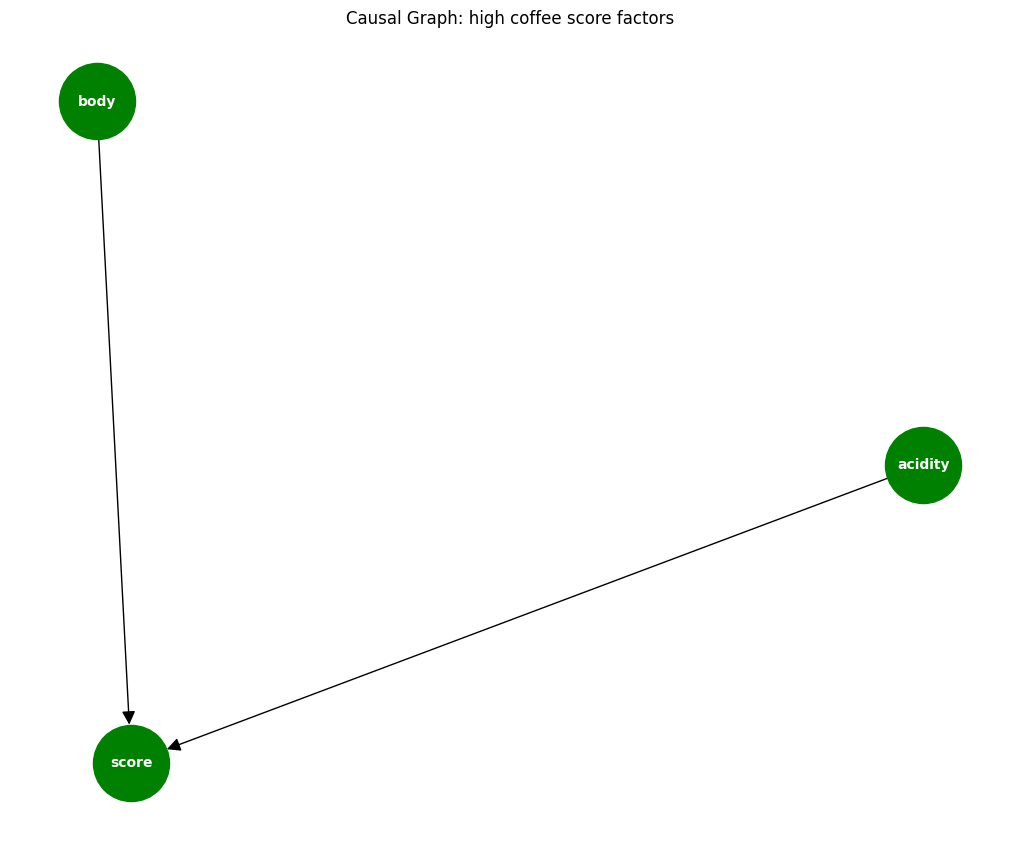

In [ ]:
# Wir visualisieren die zu untersuchenden Kausalitäten mit einem Graphen:
import networkx as nx

# Initialisierung des gerichteten Graphen
G = nx.DiGraph()

# Kanten hinzufügen
G.add_edges_from([
    ('body', 'score'),
    ('acidity', 'score')
])

# Plot hinzufügen
plt.figure(figsize=(10, 8))

# Darstellen des Graphen:
pos = nx.spring_layout(G, k=1, iterations=50)
nx.draw(G, pos,
        with_labels=True,
        node_color='green',
        node_size=3000,
        arrows=True,
        edge_color='black',
        arrowsize=20,
        font_size=10,
        font_color='white',
        font_weight='bold')

plt.title('Causal Graph: high coffee score factors')
plt.tight_layout()
plt.show()

In [ ]:
# Identifizierung des kausalen Effektes
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Schätzung des kausalen Effektes
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

print("\n🔍 Causal Analysis Results:")
print(estimate)
print("Causal Estimate is " + str(estimate.value))
# Vergleich mit einfacher Korrelation:
correlation = cotter_data_normalized['body'].corr(cotter_data_normalized['score'])
print(f"\n📊 Simple Correlation: {correlation:.3f}")


🔍 Causal Analysis Results:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d             
───────(E[score])
d[body]          
Estimand assumption 1, Unconfoundedness: If U→{body} and U→score then P(score|body,,U) = P(score|body,)

## Realized estimand
b: score~body+body*acidity
Target units: 

## Estimate
Mean value: 2.1765884375052718
### Conditional Estimates
__categorical__acidity
(-0.001, 0.3]    2.385340
(0.3, 0.4]       1.746525
(0.4, 0.5]       1.328279
dtype: float64
Causal Estimate is 2.1765884375052718

📊 Simple Correlation: 0.131


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

---

Aus den Ergebnissen ist folgendes herauszulesen:



*   **b: score~body+body*acidity:**
    - Diese Zeile suggeriert, dass der Effekt von 'body' auf 'score' je nach 'acidity'-Wert variieren kann.
*   **Mean value/Causal Estimate:**
    - Im Durchschnitt führt eine Veränderung der Körperintensität um eine Einheit zu einer Veränderung von 'score' um 2,18 Einheiten, wenn andere Faktoren konstant bleiben.
*   **Moderation des Effektes von 'body' auf 'score' durch 'acidity':**
    - Für 'acidity' im Wertebereich (-0.001, 0.3] ist der Effekt 2.385340
    - Für 'acidity' im Wertebereich (0.3, 0.4] ist der Effekt 1.746525
    - Für 'acidity' im Wertebereich  (0.4, 0.5] ist der Effekt 1.328279
*   **Vergleich Korrelation und Kausalität:**
    - Während die Korrelation die reine Assoziation zwischen 'body' und 'score' aufzeigt, liefert Kausalität ein Mass für den kausalen Effekt bei gleichzeitiger Kontrolle der Störfaktoren
    - Die höhere kausale Schätzung (2,18) zeigt, dass die tatsächliche Auswirkung von 'body' auf 'score' stärker ist, wenn Störfaktoren (wie 'acidity') berücksichtigt werden

---

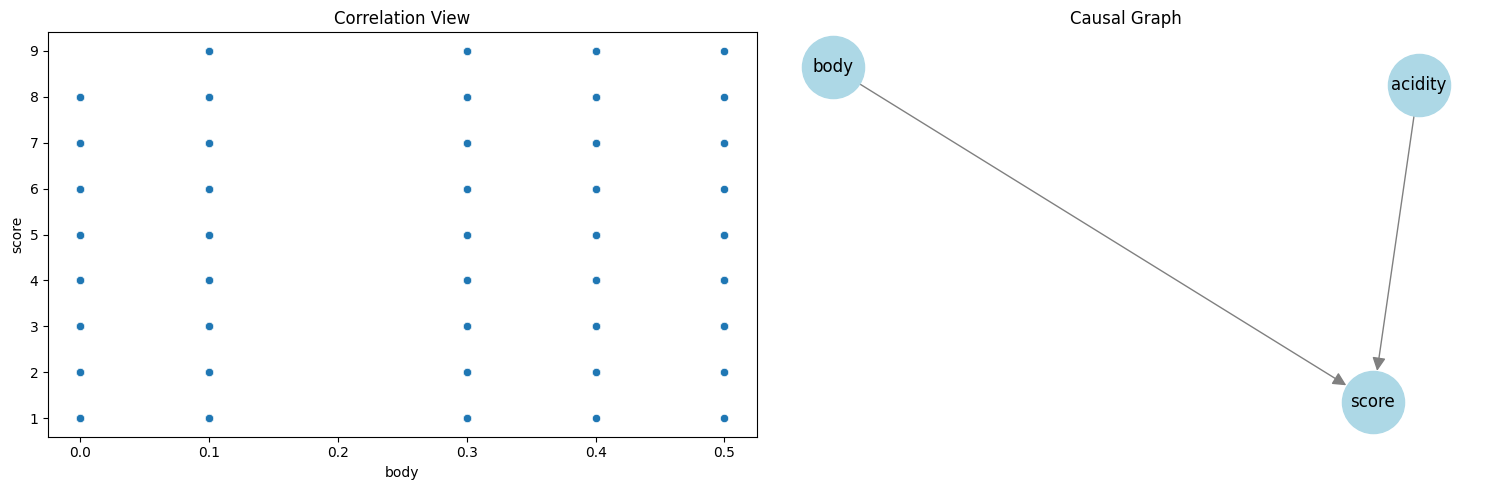

In [ ]:
# Visualisierung des Unterschieds zwischen Korrelation und Kausalität
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Correlation-Plot
sns.scatterplot(data=cotter_data_normalized,
                x='body',
                y='score',
                ax=ax1)
ax1.set_title('Correlation View')

# Visualisierung von Kausalpfaden
G = nx.DiGraph()
G.add_edges_from([
    ('body', 'score'),
    ('acidity', 'score')
])

pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax2, with_labels=True, node_color='lightblue',
        node_size=2000, arrows=True, edge_color='gray',
        arrowsize=20)
ax2.set_title('Causal Graph')

plt.tight_layout()
plt.show()

Wie sich erneut am Scatter-Plot zeigt, liegt keine Linearität oder Monotonie in der Beziehung zwischen 'body' und 'score' vor. Dies wird untermauert anhand der Erkenntnisse der Kausalitäts-Analysde, dass 'body' alleine keinen signifikanten Einfluss auf 'score' hat.